In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Data CLI

In [43]:
CLI = pd.read_csv('CLI.txt')
CLI['Time period'] = pd.to_datetime(CLI['Time period'])
CLI.head()

C:\Users\vadim\AppData\Local\Temp\ipykernel_15092\1166886134.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  CLI['Time period'] = pd.to_datetime(CLI['Time period'])


,Time period,CLI
0,1955-01-01,101.46
1,1955-02-01,101.82
2,1955-03-01,102.12
3,1955-04-01,102.33
4,1955-05-01,102.45


### Work on LI data

In [44]:
#Old work on data from OECD website 

'''cli = pd.read_csv('CLI.csv')
cli = cli[cli['REF_AREA'] == 'USA']
cli = cli[cli['Ajustement'] == "Corrigé de l'amplitude"]

cli = cli[cli['MEASURE'] == 'LI']

cli['TIME_PERIOD'] = pd.to_datetime(cli['TIME_PERIOD'])
cli = cli.sort_values(by='TIME_PERIOD')


# Supprimer les colonnes contenant uniquement des NaN
cli = cli.dropna(axis=1, how="all")

# Supprimer les colonnes qui n'ont qu'une seule valeur unique
cli = cli.loc[:, cli.nunique() > 1]
'''

'cli = pd.read_csv(\'CLI.csv\')\ncli = cli[cli[\'REF_AREA\'] == \'USA\']\ncli = cli[cli[\'Ajustement\'] == "Corrigé de l\'amplitude"]\n\ncli = cli[cli[\'MEASURE\'] == \'LI\']\n\ncli[\'TIME_PERIOD\'] = pd.to_datetime(cli[\'TIME_PERIOD\'])\ncli = cli.sort_values(by=\'TIME_PERIOD\')\n\n\n# Supprimer les colonnes contenant uniquement des NaN\ncli = cli.dropna(axis=1, how="all")\n\n# Supprimer les colonnes qui n\'ont qu\'une seule valeur unique\ncli = cli.loc[:, cli.nunique() > 1]\n'

# Data Summe School

In [45]:
df = pd.read_excel('BDD_SummerSchool_BENOIT.xlsx')
df = df[['dates', 'USA (Acc_Slow)']]
df = df.drop(index=0)
df['dates'] = pd.to_datetime(df['dates'])
df.head()

,dates,USA (Acc_Slow)
1,1985-01-15,0
2,1985-02-15,0
3,1985-03-15,0
4,1985-04-15,0
5,1985-05-15,0


# Merging

In [46]:
# Extraire le mois et l'année de la colonne 'TIME_PERIOD' de CLI
CLI['year_month'] = CLI['Time period'].dt.to_period('M')

# Extraire le mois et l'année de la colonne 'dates' de df
df['year_month'] = df['dates'].dt.to_period('M')

# Faire le merge en utilisant la colonne 'year_month'
merged_df = pd.merge(df, CLI, how='left', on='year_month')

merged_df.head()

,dates,USA (Acc_Slow),year_month,Time period,CLI
0,1985-01-15,0,1985-01,1985-01-01,100.30
1,1985-02-15,0,1985-02,1985-02-01,100.25
2,1985-03-15,0,1985-03,1985-03-01,100.21
3,1985-04-15,0,1985-04,1985-04-01,100.18
4,1985-05-15,0,1985-05,1985-05-01,100.14


In [47]:
merged_df = merged_df[['USA (Acc_Slow)', 'CLI', 'year_month']]
merged_df.head()

,USA (Acc_Slow),CLI,year_month
0,0,100.30,1985-01
1,0,100.25,1985-02
2,0,100.21,1985-03
3,0,100.18,1985-04
4,0,100.14,1985-05


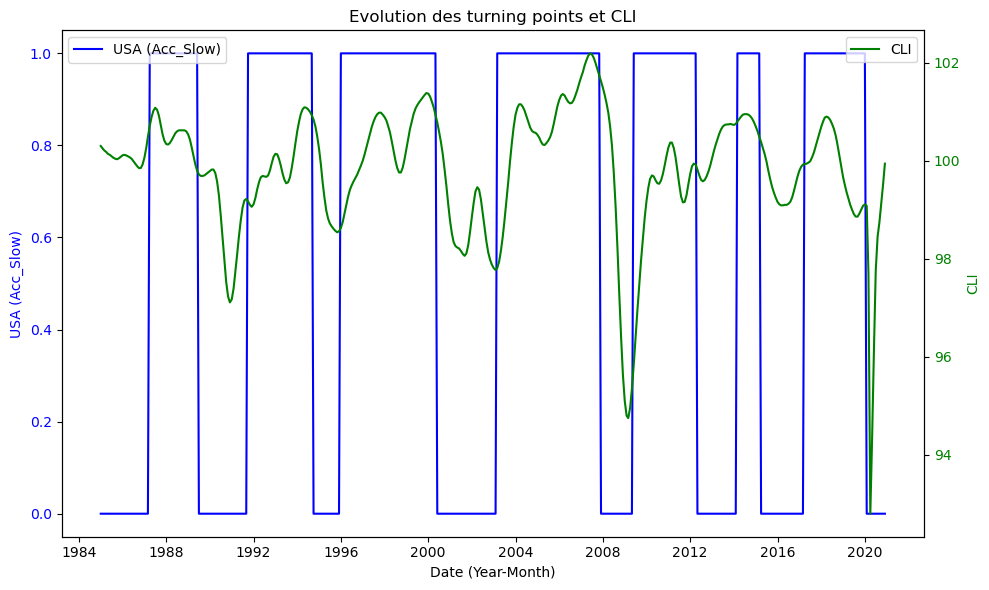

In [48]:
# Convertir 'year_month' en format datetime pour un meilleur affichage
merged_df['year_month'] = merged_df['year_month'].dt.to_timestamp()

# Créer une figure et des axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Tracer la première courbe (USA (Acc_Slow)) sur le premier axe y
ax1.plot(merged_df['year_month'], merged_df['USA (Acc_Slow)'], label='USA (Acc_Slow)', color='b')
ax1.set_xlabel('Date (Year-Month)')
ax1.set_ylabel('USA (Acc_Slow)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Créer un second axe y, partageant le même axe x
ax2 = ax1.twinx()

# Tracer la seconde courbe (CLI) sur le second axe y
ax2.plot(merged_df['year_month'], merged_df['CLI'], label='CLI', color='g')
ax2.set_ylabel('CLI', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Ajouter un titre
plt.title('Evolution des turning points et CLI')

# Ajouter les légendes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Afficher le graphique
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Données FRED

In [ ]:
fred = pd.read_csv